# Phys 41 Final Project: Metropolis-Hastings Monte Carlo

This project implements the Metropolis-Hastings algorithm for Markov Chain Monte Carlo (MCMC), and uses this algorithm to solve multiple integrals.

In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import sympy

## Multiple integrals

A typical definite integral of a function $f(x)$ over domain $D$ can be written as $\int_{D}f(x)\;dx$, where $x\in\mathbb{R}^1$ and $D\in\mathbb{R}^1$. This can be extended to integrate functions of $n$ inputs, which are written as
$$\int_{D_n}\cdots\int_{D_1}f(x_1,\dots x_n)\;dx_1\cdots dx_n\;,$$
where $\left( x_1, \dots, x_n \right) \in \mathbb{R}^n$ and $\lbrace D_1,\dots,D_n \rbrace\subset\mathbb{R}^1$. In this project, visual examples will use functions of one variable, but integrals in higher dimensions will be evaluated using the same code. This is because it's simply too difficult to visualize data involving functions $f(x_1,\dots,x_n)$ where $n\gt2$.

## Example 1
Let's say one wants to evaluate the integral of $f(x)=\sqrt{x}$ on the domain $0\leq x\leq4$ and does so analytically. This integral can be written as
$$\int_{0}^{4}\sqrt{x}\;dx$$
As any single-variable calculus student could tell you, $\int\sqrt{x}\;dx=\frac{2}{3}x^{3/2}$, and our definite integral becomes
$$\frac{2}{3}x^{3/2}\,\Bigg\rvert_{0}^{4}=\frac{2}{3}\left[ 4^{3/2} - 0^{3/2} \right]=\frac{16}{3}=5.\bar{3}$$

Instead of calculating this definite integral analytically, it can be approximated numerically using simple Riemann summation:

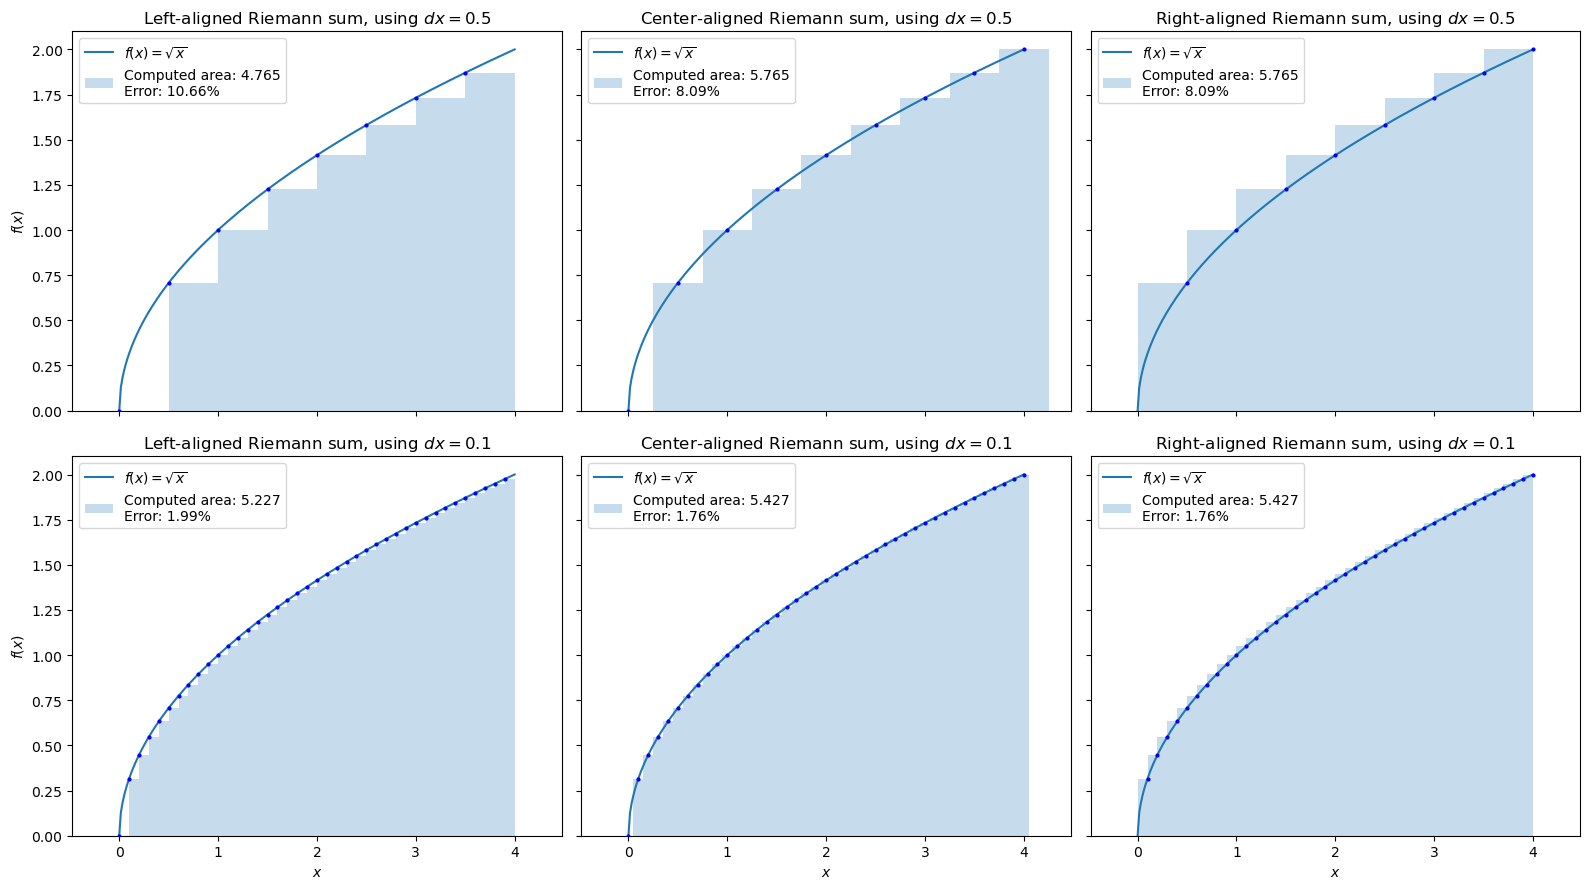

In [2]:
nrows, ncols = (2, 3)
fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(16, 9), sharex=True, sharey=True
)

j_indices, i_indices = np.meshgrid(np.arange(0, ncols), np.arange(0, nrows))
i_indices = i_indices.flatten()
j_indices = j_indices.flatten()

for i in range(0, len(i_indices)):
    ax = axes[i_indices[i]][j_indices[i]]
    domain = np.linspace(0, 4, 250)
    ax.plot(domain, np.sqrt(domain), label=r"$f(x)=\sqrt{x}$")

    if i in range(0, int(len(i_indices) / 2)):
        dx = 0.5
    else:
        dx = 0.1

    if i % 3 == 0:
        alignment = "edge"
        domain = np.arange(0, 4, dx)
        width = dx
        ax.set_title(f"Left-aligned Riemann sum, using $dx={dx:0.1f}$")
    elif i % 3 == 1:
        alignment = "center"
        domain = np.arange(0, 4 + dx, dx)
        width = dx
        ax.set_title(f"Center-aligned Riemann sum, using $dx={dx:0.1f}$")
    else:
        alignment = "edge"
        domain = np.arange(0 + dx, 4 + dx, dx)
        width = -1 * dx
        ax.set_title(f"Right-aligned Riemann sum, using $dx={dx:0.1f}$")

    heights = np.sqrt(domain)
    val = np.sum(heights * dx)
    label = f"Computed area: {val:0.3f}\nError: {100*abs((val-(16/3))/(16/3)):0.2f}%"
    ax.bar(domain, heights, width=width, align=alignment, alpha=0.25, label=label)
    ax.scatter(domain, heights, color="blue", zorder=50, s=4)
    if i % 3 == 0:
        ax.set_ylabel("$f(x)$")
    if i >= 3:
        ax.set_xlabel("$x$")
    ax.legend()

fig.tight_layout()
fig.show()

Notice that as we decrease the width of each rectangle, the numerical approximation $S=\sum_{x\in\lbrace0,dx,2dx,\dots4/dx\rbrace} f(x)\;dx$ (assuming centered Riemann summation) approaches our analytical value of $\frac{16}{3}$ and has an increasingly small error. In fact, by the definition of the derivative, $\lim_{dx\rightarrow0}S\equiv\int_{0}^{4}\sqrt{x}\;dx=\frac{16}{3}$.

In [3]:
dx = 1e-4
domain = np.arange(0, 4 + dx, dx)
val = np.sum((lambda x: np.sqrt(x))(domain) * dx)
print(
    f"Using dx={dx}, we get that the integral equals {val:0.5f}. This is an error of only {100*abs(val-(16/3))/(16/3):0.4f}%"
)

Using dx=0.0001, we get that the integral equals 5.33343. This is an error of only 0.0019%


## Example 2

Let's say one wants to evaluate the integral of $f(x)=\sin(x)\sqrt{x}$ on the domain $0\leq x\leq8\pi$, written as:
$$\int_{0}^{8\pi}\sin(x)\sqrt{x}\;dx$$
This is a much more challenging integral to solve analytically, so numeric approximation is especially useful here. Here is what an analytical solution to this integral would look like.

In [4]:
x = sympy.Symbol("x")

print("Indefinite integral:")
integral = sympy.integrate(sympy.sin(x) * sympy.sqrt(x), (x))
IPython.display.display(integral)

print("\nDefinite integral:")
integral = sympy.integrate(sympy.sin(x) * sympy.sqrt(x), (x, 0, 8 * sympy.pi))
IPython.display.display(integral)
reference_val = integral.evalf()
print(f"which evaluates to {reference_val}")

Indefinite integral:


-5*sqrt(x)*cos(x)*gamma(5/4)/(4*gamma(9/4)) + 5*sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)*sqrt(x)/sqrt(pi))*gamma(5/4)/(8*gamma(9/4))


Definite integral:


-5*sqrt(2)*sqrt(pi)*gamma(5/4)/(2*gamma(9/4)) + 5*sqrt(2)*sqrt(pi)*fresnelc(4)*gamma(5/4)/(8*gamma(9/4))

which evaluates to -4.38857215564917


Let's re-use the code from before and see how well Riemann approximation fares.

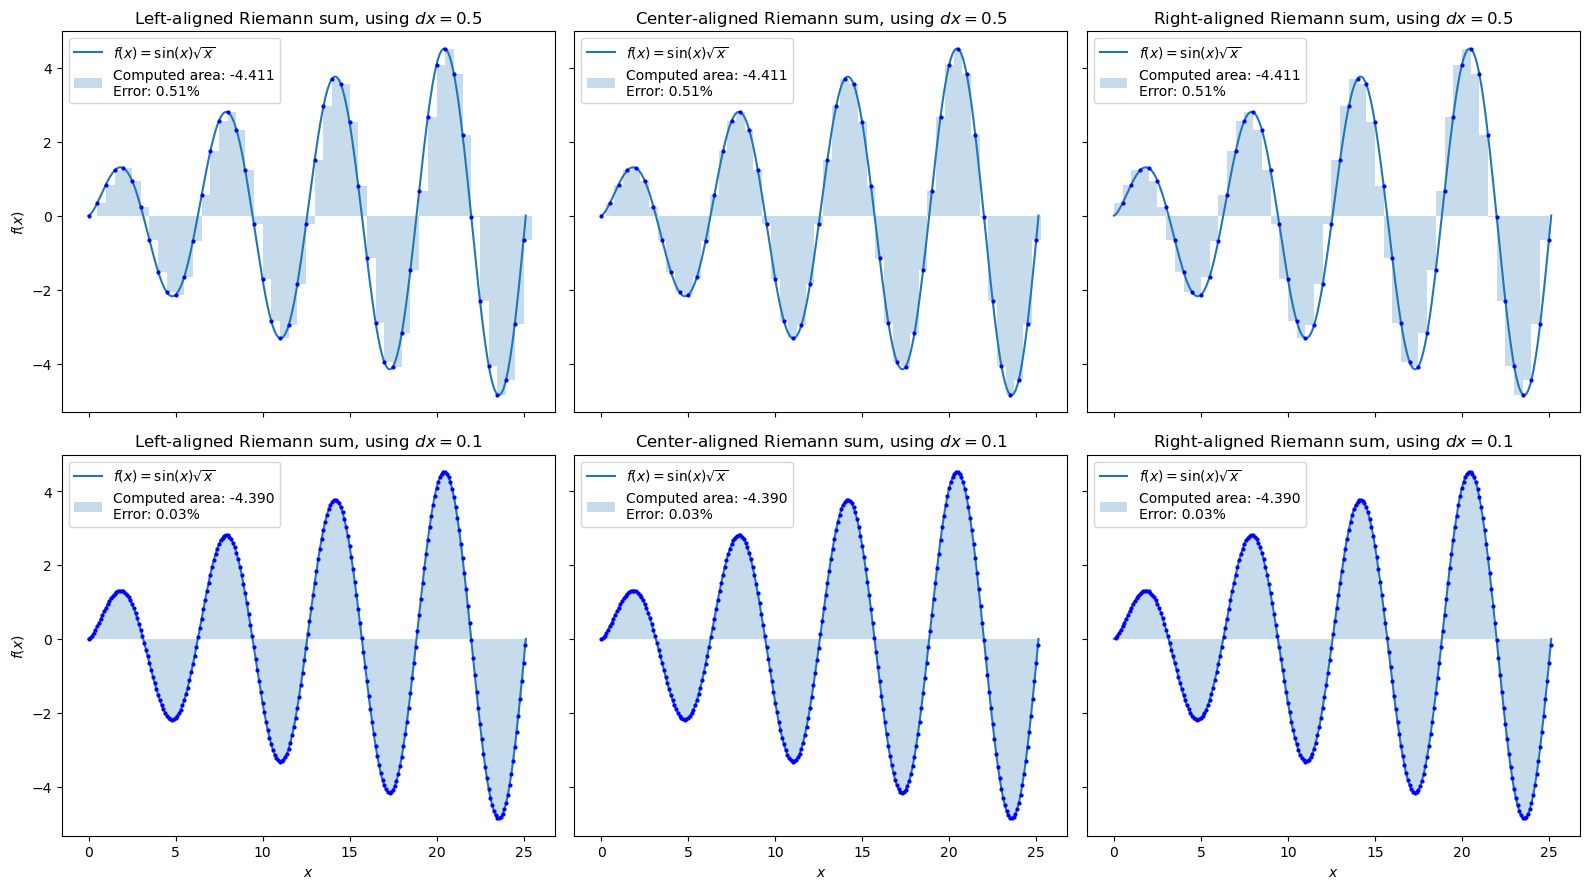

In [5]:
nrows, ncols = (2, 3)
fig, axes = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(16, 9), sharex=True, sharey=True
)

j_indices, i_indices = np.meshgrid(np.arange(0, ncols), np.arange(0, nrows))
i_indices = i_indices.flatten()
j_indices = j_indices.flatten()

for i in range(0, len(i_indices)):
    ax = axes[i_indices[i]][j_indices[i]]
    domain = np.linspace(0, 8 * np.pi, 250)
    ax.plot(domain, np.sin(domain) * np.sqrt(domain), label=r"$f(x)=\sin(x)\sqrt{x}$")

    if i in range(0, int(len(i_indices) / 2)):
        dx = 0.5
    else:
        dx = 0.1

    if i % 3 == 0:
        alignment = "edge"
        domain = np.arange(0, 8 * np.pi, dx)
        width = dx
        ax.set_title(f"Left-aligned Riemann sum, using $dx={dx:0.1f}$")
    elif i % 3 == 1:
        alignment = "center"
        domain = np.arange(0, 8 * np.pi + 1e-4, dx)
        width = dx
        ax.set_title(f"Center-aligned Riemann sum, using $dx={dx:0.1f}$")
    else:
        alignment = "edge"
        domain = np.arange(0 + dx, 8 * np.pi, dx)
        width = -1 * dx
        ax.set_title(f"Right-aligned Riemann sum, using $dx={dx:0.1f}$")

    heights = np.sin(domain) * np.sqrt(domain)
    val = np.sum(heights * dx)
    label = f"Computed area: {val:0.3f}\nError: {100*abs((val-reference_val)/reference_val):0.2f}%"
    ax.bar(domain, heights, width=width, align=alignment, alpha=0.25, label=label)
    ax.scatter(domain, heights, color="blue", zorder=50, s=4)
    if i % 3 == 0:
        ax.set_ylabel("$f(x)$")
    if i >= 3:
        ax.set_xlabel("$x$")
    ax.legend()

fig.tight_layout()
fig.show()

## Example 3

Now let's say one wants to find the integral of $f(x)=\frac{10}{x}$ on the domain $1\leq x\leq30$. We can of course write this integral as:
$$\int_1^{30}\frac{10}{x}\;dx=10\log|x|\,\Bigg|_1^{30}=10\left[ \log(30) - \log(1) \right]\approx34.01197$$
If we evenly space numbers like we have been doing, we notice something interesting.

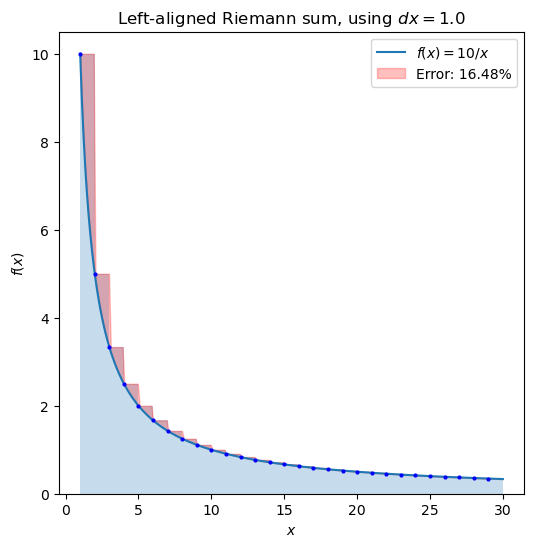

In [6]:
reference_val = 10 * np.log(30)
fig = plt.figure(figsize=(6, 6))
smooth_domain = np.linspace(1, 30, 250)
plt.plot(smooth_domain, 10 / smooth_domain, label="$f(x)=10/x$")

dx = 1.0
domain = np.arange(1, 30, dx)
heights = 10 / domain
val = np.sum(heights * dx)
plt.bar(domain, heights, width=dx, align="edge", alpha=0.25, label=f"")
plt.scatter(domain, heights, color="blue", zorder=50, s=4)


def bar_height(xs):
    return np.array(
        [heights[-1] if x == xs[-1] else heights[int(x // dx - 1)] for x in xs]
    )


plt.fill_between(
    smooth_domain,
    10 / smooth_domain,
    bar_height(smooth_domain),
    color="red",
    alpha=0.25,
    label=f"Error: {100*abs((val-reference_val)/reference_val):0.2f}%",
)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title(f"Left-aligned Riemann sum, using $dx={dx}$")
plt.legend()
fig.show()

Notice that more error, or deviation from the analytical curve, occurs at steep sections of the curve than appears at relatively flat sections of the curve. What can we do to fix this? Maybe instead of choosing uniformly spaced $x$ values, we could choose $x$ values that correlate with the distribution of the curve we're integrating. Let's choose 30 random values on the interval $\left[ 0, 30 \right]$ as our $x$ values. On the left we'll get these values by sampling a uniform distribution, and on the right we'll get these values by sampling the distribution $P(x)\propto\frac{10}{x}$. We'll choose $P(x)=\frac{1}{x}$.

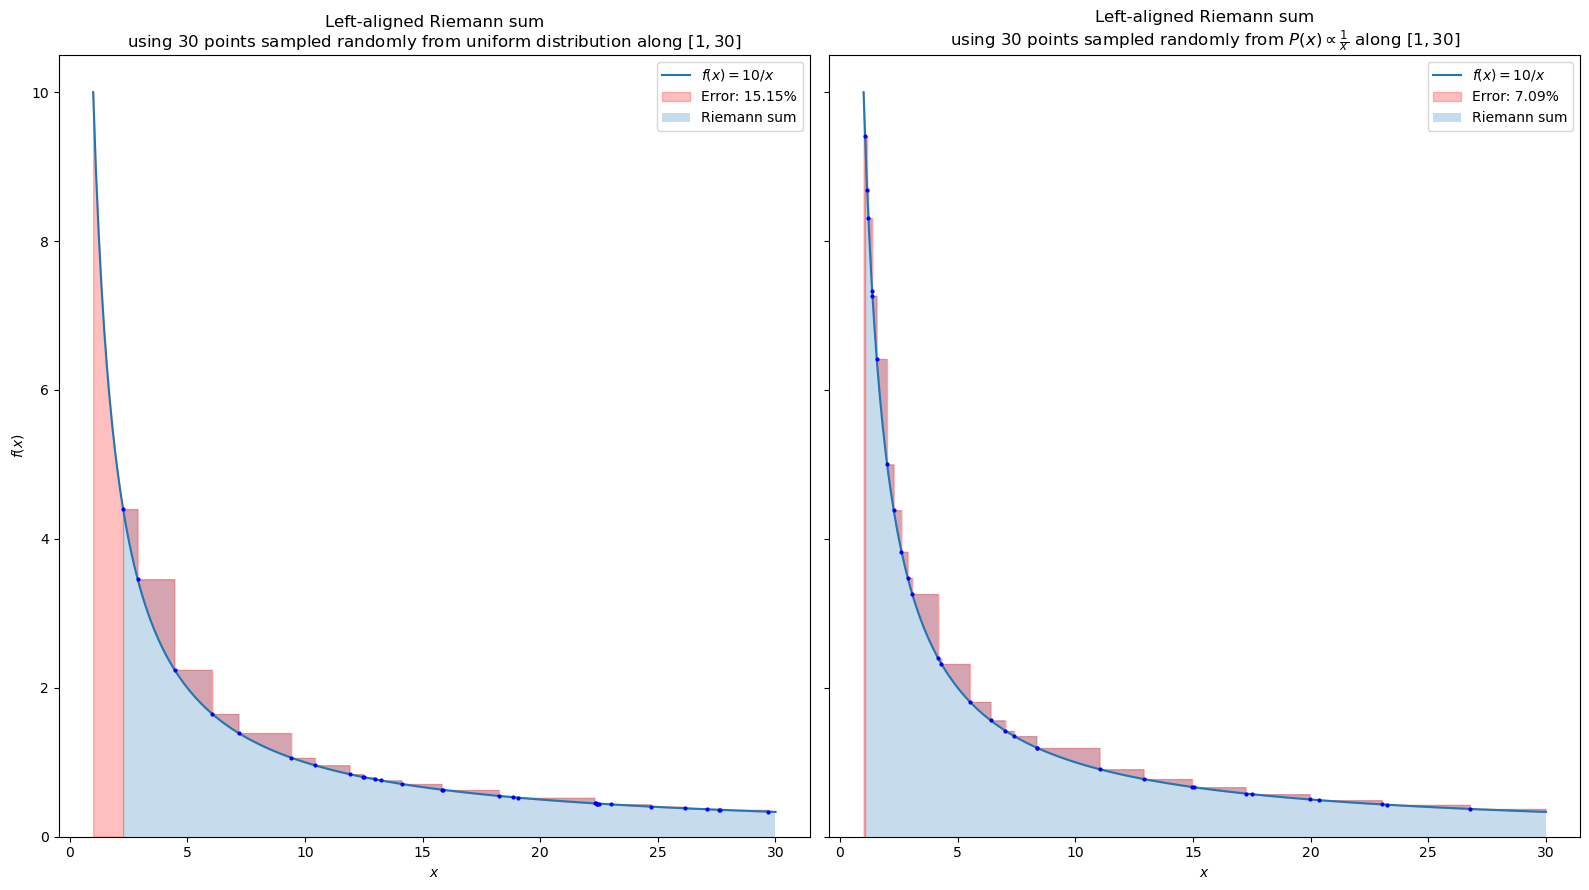

In [7]:
from tqdm import tqdm

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9), sharey=True)
rng = np.random.default_rng(seed=24680)

num_points = 30
smooth_domain = np.linspace(1, 30, 250)
axes[0].plot(smooth_domain, 10 / smooth_domain, label="$f(x)=10/x$")
axes[1].plot(smooth_domain, 10 / smooth_domain, label="$f(x)=10/x$")

domain = np.sort(rng.uniform(low=1, high=30, size=num_points))
heights = 10 / domain
heights = heights
widths = []
for i, x in enumerate(domain):
    if x == domain[-1]:
        widths.append(30 - x)
    else:
        widths.append(domain[i + 1] - domain[i])

val = np.sum(widths * heights)
axes[0].bar(
    domain, heights, width=widths, align="edge", alpha=0.25, label=f"Riemann sum"
)
axes[0].scatter(domain, heights, color="blue", zorder=50, s=4)
for i, x in enumerate(domain):
    subdomain = np.linspace(x, x + widths[i], 100)
    axes[0].fill_between(
        subdomain,
        10 / subdomain,
        [heights[i] for _ in subdomain],
        color="red",
        alpha=0.25,
    )

subdomain = np.linspace(1, domain[0])
axes[0].fill_between(
    subdomain,
    10 / subdomain,
    [0 for _ in subdomain],
    color="red",
    alpha=0.25,
    label=f"Error: {100*abs((val-reference_val)/reference_val):0.2f}%",
)
axes[0].legend()
axes[0].set_ylabel("$f(x)$")
axes[0].set_xlabel("$x$")
axes[0].set_title(
    f"Left-aligned Riemann sum\nusing {num_points} points sampled randomly from uniform distribution along $\\left[ 1,30 \\right]$"
)

domain = []
while len(domain) < num_points:
    x = rng.uniform(
        low=1,
        high=30,
    )
    y = 1 / x
    y_temp = rng.random()
    if y_temp < y:
        domain.append(x)

domain = np.sort(np.array(domain))
heights = 10 / domain
widths = []
for i, x in enumerate(domain):
    if x == domain[-1]:
        widths.append(30 - x)
    else:
        widths.append(domain[i + 1] - domain[i])

val = np.sum(widths * heights)
axes[1].bar(
    domain, heights, width=widths, align="edge", lw=5, alpha=0.25, label=f"Riemann sum"
)
axes[1].scatter(domain, heights, color="blue", zorder=50, s=4)
for i, x in enumerate(domain):
    subdomain = np.linspace(x, x + widths[i], 100)
    axes[1].fill_between(
        subdomain,
        10 / subdomain,
        [heights[i] for _ in subdomain],
        color="red",
        alpha=0.25,
    )

subdomain = np.linspace(1, domain[0])
axes[1].fill_between(
    subdomain,
    10 / subdomain,
    [0 for _ in subdomain],
    color="red",
    alpha=0.25,
    label=f"Error: {100*abs((val-reference_val)/reference_val):0.2f}%",
)
axes[1].legend()
axes[1].set_xlabel("$x$")
axes[1].set_title(
    f"Left-aligned Riemann sum\nusing {num_points} points sampled randomly from $P(x)\\propto\\frac{{1}}{{x}}$ along $\\left[ 1,30 \\right]$"
)


fig.tight_layout()
fig.show()

Both integral approximations used the same number of points, but by carefully choosing which points to sample we capture more of the curve's detail and therefore get a better approximation. This technique of using more points where we have more complicated features of the curve is called importance sampling.

But where did our $P(x)$ come from? We know that $P(x)$ ought to be proportional to $f(x)=\frac{1}{x}$, but should $P(x)$ be $\frac{1}{x}$ as used above? Why not $\frac{50\,000}{x}$? Or how about $\frac{0.001}{x}$? Any of these distributions will eventually (if $n$ is very large) get us $n$ values distributed properly along $f(x)$, but the time it takes to get those $n$ values is dependent on our choice of $P(x)$. Let's compare some choices of $P(x)$.

In [8]:
import time

num_points = 1000
p_numerators = [1, 50000, 0.001]
for p_numerator in p_numerators:
    domain = []
    counter = 0
    start = time.process_time()
    while len(domain) < num_points:
        counter += 1
        x = rng.uniform(
            low=1,
            high=30,
        )
        y = p_numerator / x
        y_temp = rng.random()
        if y_temp < y:
            domain.append(x)
    stop = time.process_time()
    elapsed_time = stop - start

    domain = np.sort(np.array(domain))
    heights = 10 / domain
    widths = []
    for i, x in enumerate(domain):
        if x == domain[-1]:
            widths.append(30 - x)
        else:
            widths.append(domain[i + 1] - domain[i])

    val = np.sum(widths * heights)
    error = 100 * abs((val - reference_val) / reference_val)
    print(
        f"\nUsing {num_points} points sampled from P(x)={p_numerator}/x, we approximate the integral from 1 to 30 of 10/x with an error of {error:0.2f}%."
    )
    print(
        f"Sampling these points took {elapsed_time:0.3} seconds. The average time per valid sample was {elapsed_time/num_points:0.3} seconds."
    )
    print(
        f'{counter} points were tried, of which {num_points} were accepted as sample values. This means there were {counter-num_points} "wasted" values.\n'
    )


Using 1000 points sampled from P(x)=1/x, we approximate the integral from 1 to 30 of 10/x with an error of 0.20%.
Sampling these points took 0.0172 seconds. The average time per valid sample was 1.72e-05 seconds.
8489 points were tried, of which 1000 were accepted as sample values. This means there were 7489 "wasted" values.


Using 1000 points sampled from P(x)=50000/x, we approximate the integral from 1 to 30 of 10/x with an error of 0.45%.
Sampling these points took 0.00203 seconds. The average time per valid sample was 2.03e-06 seconds.
1000 points were tried, of which 1000 were accepted as sample values. This means there were 0 "wasted" values.


Using 1000 points sampled from P(x)=0.001/x, we approximate the integral from 1 to 30 of 10/x with an error of 0.15%.
Sampling these points took 17.1 seconds. The average time per valid sample was 0.0171 seconds.
8827890 points were tried, of which 1000 were accepted as sample values. This means there were 8826890 "wasted" values.



We see that when the numerator of $P(x)$ is too big, *all* of our candidate values sampled from the uniform distribution on $\left[ 1,30 \right]$ were accepted and our resulting distrubition is uniform, not proportional to $\frac{10}{x}$ at all. That is what causes the increased error relative to the other numerators.

When the numerator of $P(x)$ is too small, we get a decent approximation, but we waste much time trying out points that don't end up being used. This is where adaptive acceptance ratio Metropolis-Hastings can help.

## Metropolis-Hastings

Here is what we have been doing in our crude importance sampling:

 1. Scale $f(x)$ by an arbitrary amount to get $P(x)$.
 2. Sample a random candidate value $a$ from the uniform distribution on the domain $D$.
 3. Sample a comparison value $b$ from the uniform distribution on the domain $\left[ 0,1 \right]$.
 4. If $f(a)\gt b$, we add $a$ to our growing list of "important" samples. If not, we discard $a$ and proceed to Step 2.
 5. If our list of samples has not yet met our length requirement, we proceed to Step 2.

In Metropolis-Hastings Monte Carlo we do the following:

 1. Choose a function $g(x^\prime|x)$. We will use the Gaussian distribution centered on $x$ with standard deviation $1$: $g(x^\prime|x)=\left(1/\sqrt{2\pi}\right)\exp\left( -\frac{1}{2}\left( x^\prime-x \right)^2 \right)$.
 2. Set $t=0$ and find $x_t$ when $t=0$. Here we will get $x_0$ by sampling from the uniform distribution on the domain $D$, but one could just as well set $x_0$ to be, for example, the midpoint of $D$.
 3. Sample a random candidate value $x^\prime$ from $g(x^\prime|x_t)$.
 4. Calculate the probability of accepting this candidate $A(x^\prime,x_t)=\min\left(1, \frac{f(x^\prime)}{f(x_t)} \frac{g(x_t|x^\prime)}{g(x^\prime|x_t)} \right)$.
 5. Sample a random comparison value $b$ from the uniform distribution on the domain $\left[ 0,1 \right]$. If $b\leq A(x^\prime,x_t)$, we accept the new state, set $x_{t+1}=x^\prime$ and increment $t$ by one. Otherwise, we reject the new state and set $x_{t+1}=x_t$ and increment $t$ by one.
 6. If $t$ has not yet met our required value, we proceed to Step 3.

If we want to use adaptive acceptance ratio Metropolis-Hastings, we simply run Metropolis-Hastings for a while and vary the standard deviation parameter in $g(x^\prime|x)$ until some criterion is met, often that 10% to 50% of the last $m$ candidate values were accepted. For brevity's sake, $g(x^\prime|x)$ is kept unchanged throughout the sampling in this project.

33.86220163842433
0.2670786044965291


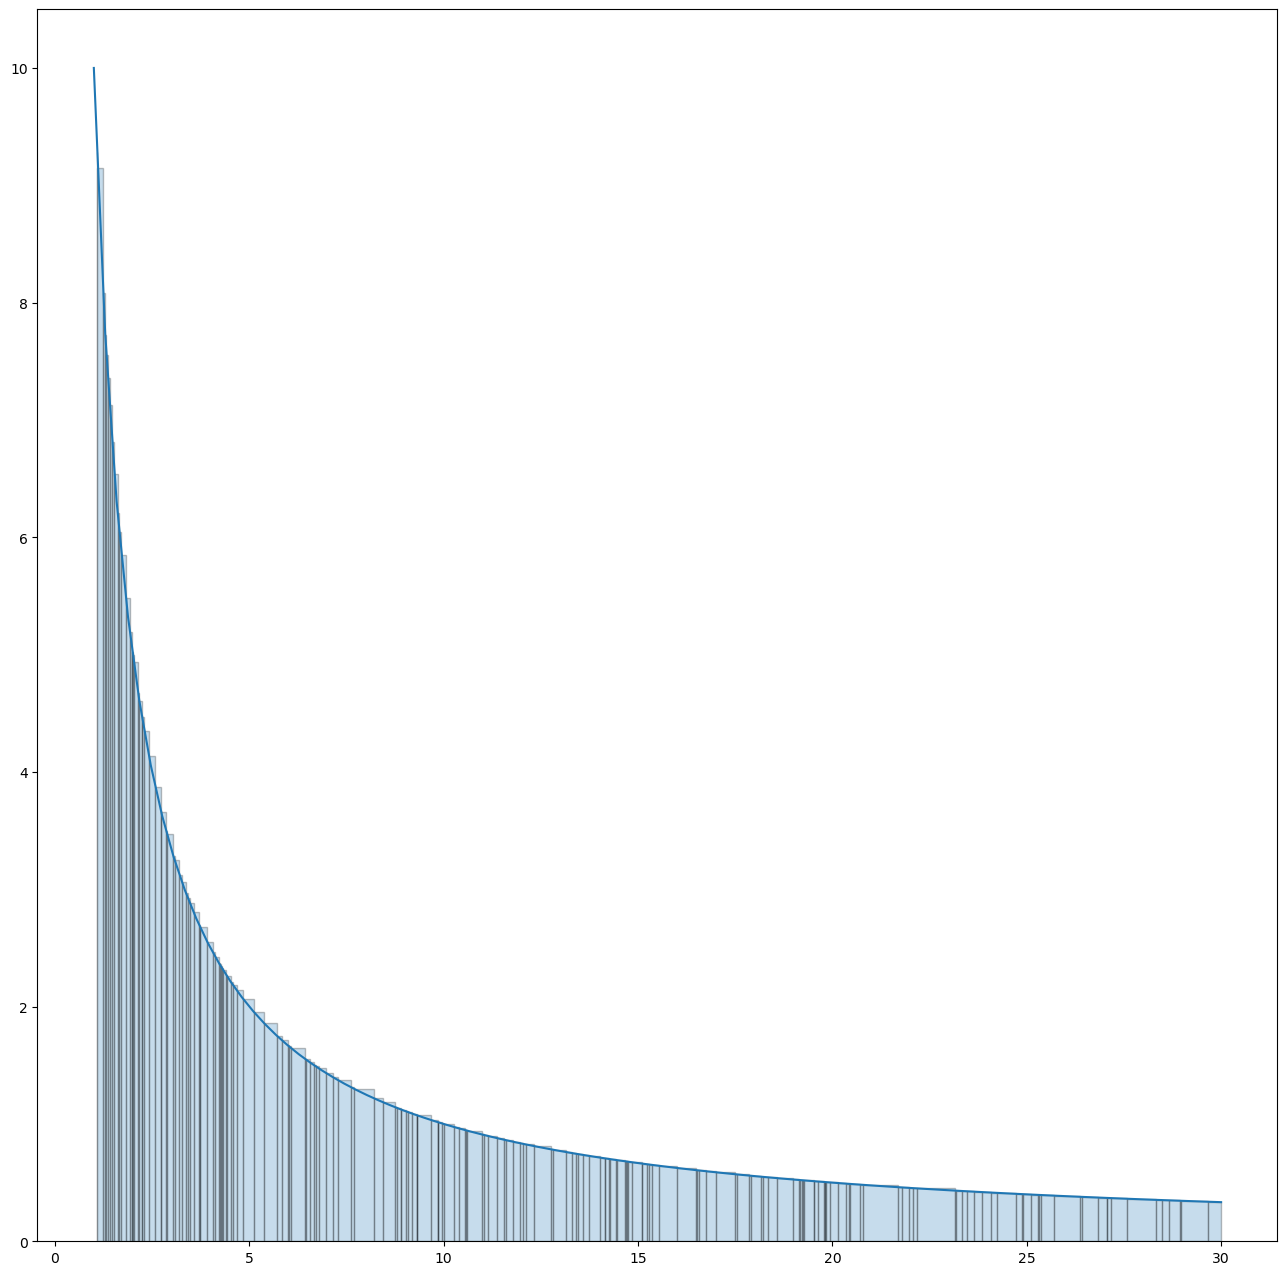

In [41]:
def run_MHMC(f, g, domain, num_points=50):
    fig = plt.figure(figsize=(16, 16))
    plt.plot(np.linspace(1, 30, 100), [10 / x for x in np.linspace(1, 30, 100)])

    rng = np.random.default_rng(seed=135791)
    x_0 = rng.uniform(low=1, high=30)
    t = 0
    samples = [x_0]
    heights = [f(x_0, domain)]
    As = []

    while len(set(samples)) < num_points:
        x_prime = g(samples[t], rng)
        height = f(x_prime, domain)
        numerator = height * g(x_prime, rng, x_prime=samples[t])
        denominator = heights[t] * g(samples[t], rng, x_prime=x_prime)
        A = min(1, numerator / denominator)
        As.append(A)
        b = rng.random()
        if b <= A:
            samples.append(x_prime)
            heights.append(height)
        else:
            samples.append(samples[t])
            heights.append(heights[t])
        t += 1

    # Remove duplicate samples
    temp_samples = []
    [temp_samples.append(sample) for sample in samples if sample not in temp_samples]
    samples = temp_samples

    # Remove duplicate heights
    temp_heights = []
    [temp_heights.append(height) for height in heights if height not in temp_heights]
    heights = temp_heights

    samples_and_heights = list(zip(samples, heights))
    samples_and_heights.sort(key=(lambda point: point[0]))

    widths = []
    for i, (sample, height) in enumerate(samples_and_heights):
        if sample == samples_and_heights[-1][0]:
            widths.append(domain[1] - sample)
        else:
            widths.append(samples_and_heights[i + 1][0] - sample)

    plt.bar(
        [point[0] for point in samples_and_heights],
        height=[point[1] for point in samples_and_heights],
        width=widths,
        align="edge",
        alpha=0.25,
        linewidth=1,
        edgecolor="black",
    )

    return (
        sum(
            [
                widths[i] * samples_and_heights[i][1]
                for i in range(0, len(samples_and_heights))
            ]
        ),
        As,
    )


def f(x, domain):
    if domain[0] <= x <= domain[1]:
        return 10 / x
    else:
        return 0


def g(x_t, rng, x_prime=None):
    sigma = 16
    if x_prime is None:
        return rng.normal(loc=x_t, scale=sigma)
    else:
        return np.exp(-0.5 * ((x_prime - x_t) / sigma) ** 2) / (
            sigma * np.sqrt(2 * np.pi)
        )


result = run_MHMC(f, g, domain=(1, 30), num_points=200)
print(result[0])
print(np.mean(result[1][-1*int(0.2*len(result[1])):]))


In [26]:
max(heights)

9.938064642885875

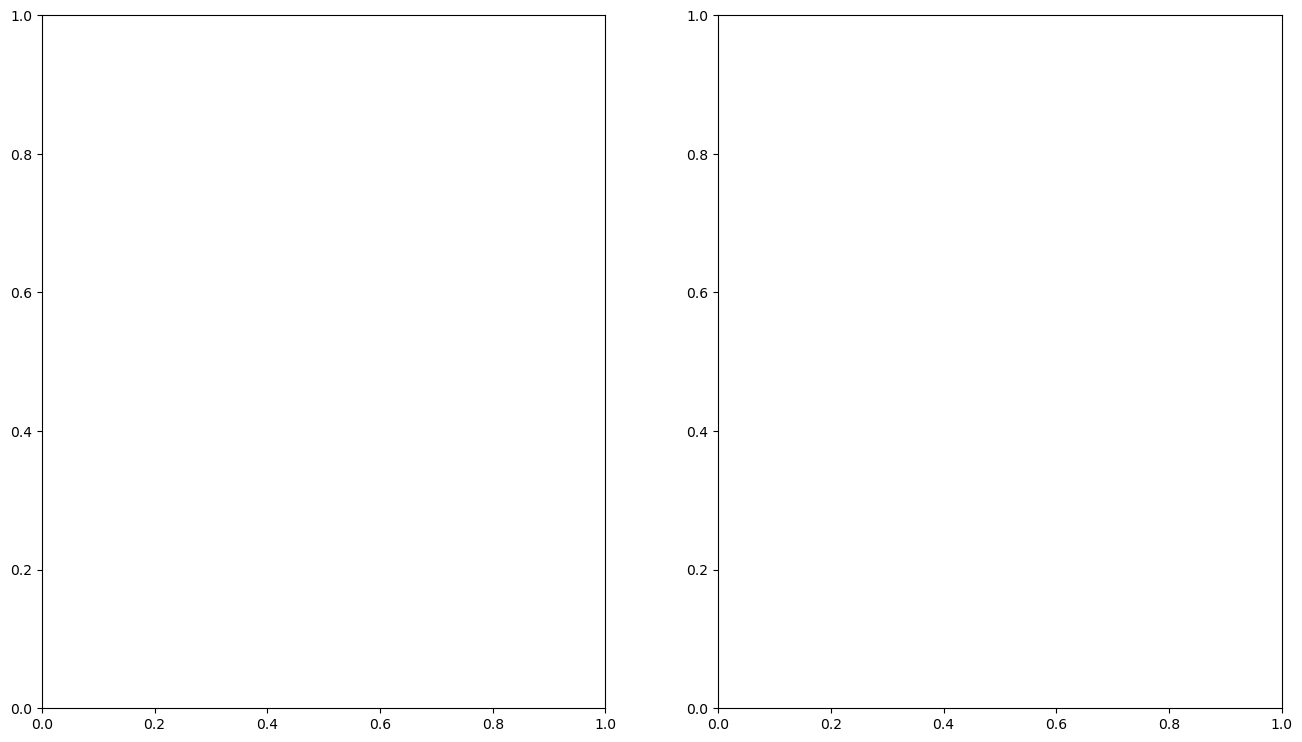

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))